In [1]:
#Import the libraries
from tabula import read_pdf
from tabulate import tabulate
from numpy import percentile
import matplotlib.pyplot as plt
import difflib
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
path = "/Users/ranjitsingh/Downloads/Assignment1.pdf"

In [3]:
#reads table from pdf file
df = read_pdf(path,pages="all") #address of pdf file

In [4]:
#See the dataset for question 1
print(df[0])

  Customer  Age
0    David   46
1     Lisa   25
2  Michael   27
3    Susan   27
4  William   28
5      Mat   36
6    James   53
7    Kevin   27
8     Paul   18
9  Anthony   25


### 1.1 Calculate the Mean, median and mode

In [5]:
print("\n----------- The Mean is-----------\n")
print(df[0]['Age'].mean())
 
print("\n----------- The Median is-----------\n")
print(df[0]['Age'].median())
 
print("\n----------- The Mode is-----------\n")
print(df[0]['Age'].mode())


----------- The Mean is-----------

31.2

----------- The Median is-----------

27.0

----------- The Mode is-----------

0    27
Name: Age, dtype: int64


In [6]:
print(df[1])

   Month  Temperature (°F)
0    Jan              52.3
1    Feb              56.6
2    Mar              64.6
3    Apr              72.5
4    May              79.9
5    Jun              86.4
6    Jul              89.1
7    Aug              88.1
8    Sep              82.2
9    Oct              72.7
10   Nov              63.6
11   Dec              54.0


### 2.1 Compute the five-number summary

In [7]:
# calculate quartiles
quartiles = percentile(df[1]['Temperature (°F)'], [25, 50, 75])
# calculate min/max
data_min, data_max = df[1]['Temperature (°F)'].min(), df[1]['Temperature (°F)'].max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 52.300
Q1: 61.850
Median: 72.600
Q3: 83.250
Max: 89.100


### 2.2 Outliers in box plot 

There are no outliers as there are no points beyond the lower and upper whisker of the boxplot

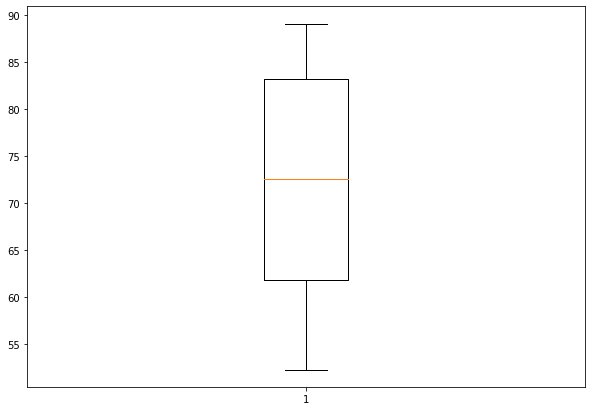

<Figure size 720x504 with 0 Axes>

In [8]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df[1]['Temperature (°F)'])
fig = plt.figure(figsize =(10, 7))
# show plot
plt.show()

### 2.3 Plotting the data

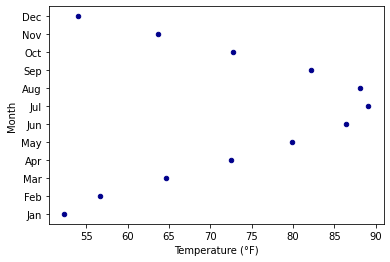

In [9]:
ax1 = df[1].plot.scatter(x='Temperature (°F)',y='Month', c='DarkBlue')

From the above scatter plot we can observe that as the months increase the temperature also increases till July after which the temperature starts to decline to eventually reach back to the same tempertaure as the start of the month.

In [10]:
print(df[2])
sim = df[2]

     Customer    David     Susan        Lisa
0  Profession  Manager   Manager  Programmer
1   Education    B.Sc.     B.Sc.       M.Sc.
2     Hobbies     Golf  Swimming    Swimming


### 3.1 Attributes in the dataset

The attributes in the table are nominal

### 3.2 Similarity values between “David” and “Susan”

In [11]:
sim['DS_similarity'] = (
    sim[['David','Susan']]
    .apply(lambda x: len(difflib.get_close_matches(x[0].lower(), [x[1].lower()])), axis=1)
)
print(sim)

     Customer    David     Susan        Lisa  DS_similarity
0  Profession  Manager   Manager  Programmer              1
1   Education    B.Sc.     B.Sc.       M.Sc.              1
2     Hobbies     Golf  Swimming    Swimming              0


### 3.3 Similarity values between “Susan” and “Lisa”

In [12]:
sim['DS_similarity'] = (
    sim[['Lisa','Susan']]
    .apply(lambda x: len(difflib.get_close_matches(x[0].lower(), [x[1].lower()])), axis=1)
)
print(sim)

     Customer    David     Susan        Lisa  DS_similarity
0  Profession  Manager   Manager  Programmer              0
1   Education    B.Sc.     B.Sc.       M.Sc.              1
2     Hobbies     Golf  Swimming    Swimming              1


### 4.1 Types of Attributes

In [13]:
print(df[3])
sim =df[3]

        Patient  Tom  Mat Lucy
0         Fever  Yes   No  Yes
1         Cough   No  Yes  Yes
2        Sleepy  Yes   No   No
3      Headache  Yes  Yes   No
4  Running nose  Yes  Yes   No
5       Fatigue  Yes  Yes  Yes
6        Sweaty  Yes   No  Yes
7     Dizziness  Yes  Yes  Yes


The attributes are binary

### 4.2 Similarity values between “Tom” and “Mat”

In [14]:
sim['DS_similarity'] = (
    sim[['Tom','Mat']]
    .apply(lambda x: len(difflib.get_close_matches(x[0].lower(), [x[1].lower()])), axis=1)
)
print(sim)

        Patient  Tom  Mat Lucy  DS_similarity
0         Fever  Yes   No  Yes              0
1         Cough   No  Yes  Yes              0
2        Sleepy  Yes   No   No              0
3      Headache  Yes  Yes   No              1
4  Running nose  Yes  Yes   No              1
5       Fatigue  Yes  Yes  Yes              1
6        Sweaty  Yes   No  Yes              0
7     Dizziness  Yes  Yes  Yes              1


### 4.3 Similarity values between “Lucy” and “Mat”

In [15]:
sim['DS_similarity'] = (
    sim[['Lucy','Mat']]
    .apply(lambda x: len(difflib.get_close_matches(x[0].lower(), [x[1].lower()])), axis=1)
)
print(sim)

        Patient  Tom  Mat Lucy  DS_similarity
0         Fever  Yes   No  Yes              0
1         Cough   No  Yes  Yes              1
2        Sleepy  Yes   No   No              1
3      Headache  Yes  Yes   No              0
4  Running nose  Yes  Yes   No              0
5       Fatigue  Yes  Yes  Yes              1
6        Sweaty  Yes   No  Yes              0
7     Dizziness  Yes  Yes  Yes              1


### 5.1 Attributes in the dataset

A numeric ratio-scaled attribute 

### 5.2 Simalrity measure choosen

Euclidean distance measure

### 5.3 Similarity values between “A” and “B”

In [16]:
print(df[4])
sim = df[4]

         Flower    A    B    C
0  Sepal Length  5.1  7.0  4.8
1   Sepal Width  3.5  3.2  3.4
2  Petal Length  1.4  4.7  1.9
3   Petal Width  0.2  1.4  0.2


In [17]:
array_1=sim['A']
array_2=sim['B']
dist = np.linalg.norm(array_1 - array_2)
print(dist)

4.00374824383352


### 5.4 Similarity values between “B” and “C”

In [18]:
array_1=sim['B']
array_2=sim['C']
dist = np.linalg.norm(array_1 - array_2)
print(dist)

3.762977544445356


### 6.1 Attributes in the dataset

The attributes are of type ordinal

In [19]:
sim=df[5]

cs_list=df[6]['Credit Score Range']
sr_list=df[6]['Salary Range']
sr_list=sr_list.dropna()
a_list=df[6]['Age']
a_list=a_list.dropna()
sim

,Customer,Kevin,John,Daniel
0,Credit Score Range,Excellent,Very good,Good
1,Salary Range,High,Very High,Medium
2,Age,Senior,Middle Age,Young


In [20]:
sim = sim.replace(['Excellent'],'5')
sim = sim.replace(['Very good'],'4')
sim = sim.replace(['Good'],'3')
sim = sim.replace(['Very High'],'4')
sim = sim.replace(['High'],'3')
sim = sim.replace(['Medium'],'2')
sim = sim.replace(['Senior'],'3')
sim = sim.replace(['Middle Age'],'2')
sim = sim.replace(['Young'],'1')

In [21]:
sim.set_index('Customer')

,Kevin,John,Daniel
Customer,,,
Credit Score Range,5,4,3
Salary Range,3,4,2
Age,3,2,1


In [22]:
# initialize list of lists
data = [['Kevin', 5,3,3], ['John', 4,4,2], ['Daniel', 3,2,1]]
  
# Create the pandas DataFrame
df1 = pd.DataFrame(data, columns=['Customer', 'Credit Score Range','Salary Range','Age'])

df1

,Customer,Credit Score Range,Salary Range,Age
0,Kevin,5,3,3
1,John,4,4,2
2,Daniel,3,2,1


In [23]:
df1['Credit zscore'] = stats.zscore(df1['Credit Score Range'])
df1['Salary zscore'] = stats.zscore(df1['Salary Range'])
df1['Age zscore'] = stats.zscore(df1['Age'])
df1=df1.drop(['Credit Score Range','Salary Range','Age'],axis=1)

In [24]:
df1

,Customer,Credit zscore,Salary zscore,Age zscore
0,Kevin,1.224745,0.000000,1.224745
1,John,0.000000,1.224745,0.000000
2,Daniel,-1.224745,-1.224745,-1.224745


In [25]:
#Dropping customer in order to calculate the metrics(float/string will throw error)
df1=df1.drop(['Customer'],axis=1)

### 6.2 Similarity values between “Kevin” and “John”

### 6.3 Similarity values between “John” and “Daniel”

In [26]:
#The below euclidean distance pairwise matrix helps compare the similarity between the rows
from sklearn.metrics.pairwise import euclidean_distances

pairwise_dist_mat = euclidean_distances(df1)
pairwise_dist_mat

array([[0.        , 2.12132034, 3.67423461],
       [2.12132034, 0.        , 3.        ],
       [3.67423461, 3.        , 0.        ]])

### 7 Normalization of data

In [27]:
print(df[7])
norm=df[7]

##norm.pivot(index='Patient',columns='Height (feet)')
##norm.pivot(columns='Height (feet)')['Patient']

         Patient  Tom  Mat  Lucy  Brian
0  Height (feet)  5.7  6.2   5.1    6.4


In [28]:
# initialize list of lists
data = [['Tom',5.7],['Mat',6.2],['Lucy',5.1],['Brian', 6.4]]
  
# Create the pandas DataFrame
df2 = pd.DataFrame(data, columns=['Patient', 'Height (feet)'])

df2

,Patient,Height (feet)
0,Tom,5.7
1,Mat,6.2
2,Lucy,5.1
3,Brian,6.4


In [29]:
# copy the data
df_min_max_scaled = df2.copy()
  
# apply normalization techniques by Column 1
column = 'Height (feet)'
df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
display(df_min_max_scaled)

,Patient,Height (feet)
0,Tom,0.461538
1,Mat,0.846154
2,Lucy,0.000000
3,Brian,1.000000
